#Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv("/content/export (2).csv")

#Preparing data

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
#no object type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# no missing values and dupliacate values

In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

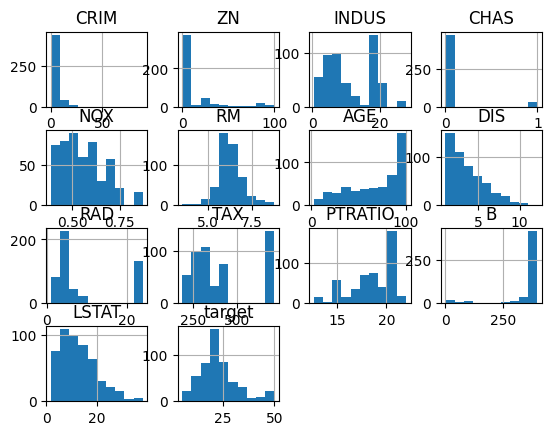

In [10]:
df.hist()

<Axes: >

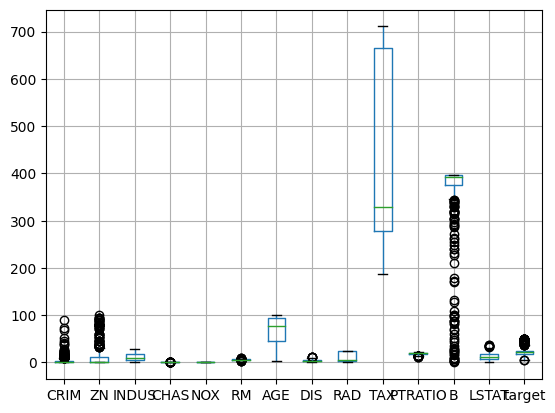

In [11]:
df.boxplot()

#Correlation

In [12]:
corr = df.corr()

<Axes: >

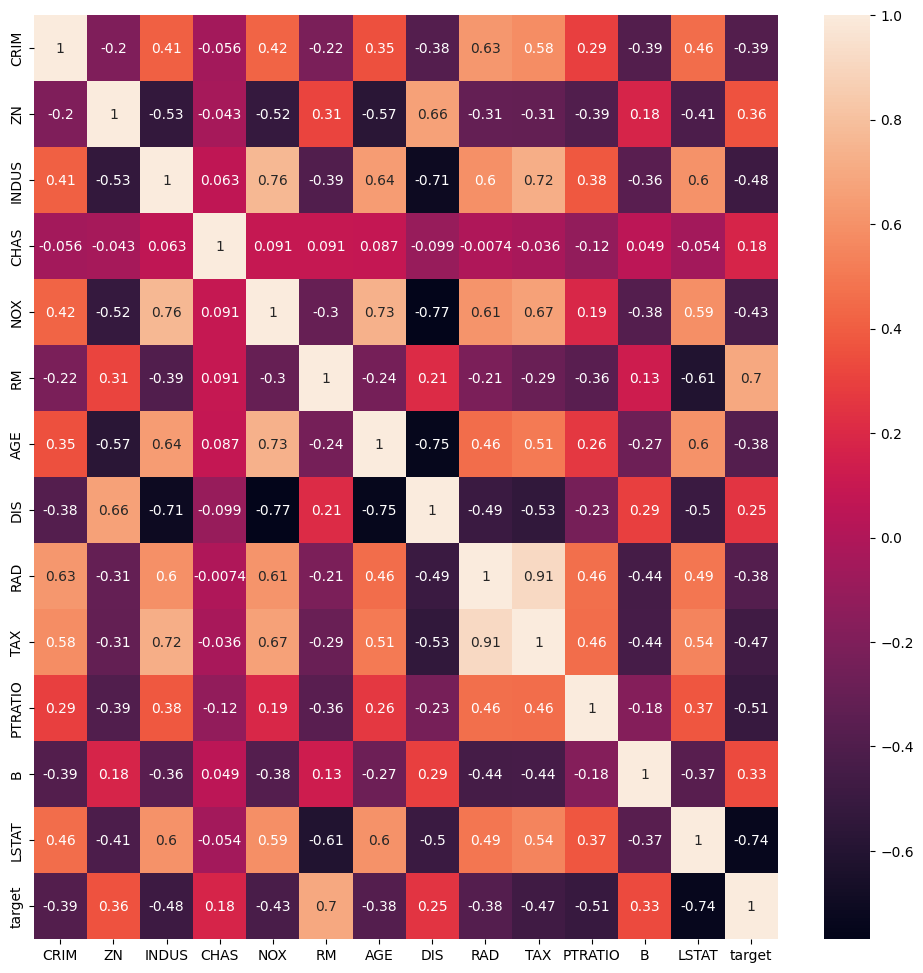

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True)

#Setting feature vector and target variable

In [14]:
X = df.drop(['target'], axis=1)
y = df['target']

#Feature Scaling

In [15]:
scaler = StandardScaler()

In [16]:
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [18]:
scaled_df = pd.DataFrame(X_scaled)

#PCA

In [19]:
#PCA with max number of components

In [20]:
pca = PCA(n_components=13)

In [21]:
X_transformed = pca.fit_transform(X_scaled)

In [22]:
X_transformed

array([[-2.09829747,  0.77311275,  0.34294273, ..., -0.03300036,
         0.01944023,  0.36597533],
       [-1.45725167,  0.59198521, -0.69519931, ..., -0.64080983,
        -0.12579741, -0.07071949],
       [-2.07459756,  0.5996394 ,  0.1671216 , ..., -0.48755672,
         0.13332653, -0.0140218 ],
       ...,
       [-0.31236047,  1.15524644, -0.40859759, ...,  0.11565634,
         0.28196407,  0.06247358],
       [-0.27051907,  1.04136158, -0.58545406, ...,  0.0870124 ,
         0.30170082,  0.05436991],
       [-0.12580322,  0.76197805, -1.294882  , ...,  0.18432101,
         0.23273318,  0.01970872]])

In [23]:
X_transformed_df = pd.DataFrame(X_transformed, columns=[f'PCA_{i}' for i in range(1,14)])

In [24]:
X_transformed_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,-0.033000,0.019440,0.365975
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,-0.640810,-0.125797,-0.070719
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,-0.487557,0.133327,-0.014022
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901,-0.360209,0.508678,0.007847
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880,-0.395150,0.497732,0.014274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.314968,0.724285,-0.860896,-0.434740,-1.121040,0.508064,0.199056,-0.249896,0.877036,0.183086,0.493590,0.450386,0.078978
502,-0.110513,0.759308,-1.255979,-0.309376,-0.891542,0.408208,0.191779,-0.146502,0.853628,0.631847,0.375688,0.252082,0.037162
503,-0.312360,1.155246,-0.408598,-0.786304,-1.595185,0.467947,0.294119,-0.638660,0.981032,0.589670,0.115656,0.281964,0.062474
504,-0.270519,1.041362,-0.585454,-0.678134,-1.416024,0.482259,0.271597,-0.579344,0.936755,0.594610,0.087012,0.301701,0.054370


In [25]:
X_transformed_df.describe()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,506.000000,5.060000e+02,5.060000e+02
mean,1.123388e-16,-2.808469e-17,1.123388e-16,7.021173e-17,-6.319056e-17,-1.404235e-17,-2.808469e-17,3.159528e-17,-1.404235e-17,0.000000,0.000000,-3.159528e-17,-1.114611e-16
std,2.477697e+00,1.198379e+00,1.115830e+00,9.269699e-01,9.145868e-01,8.116089e-01,7.324044e-01,6.299854e-01,5.267748e-01,0.469759,0.431721,4.118716e-01,2.522598e-01
min,-4.854107e+00,-3.609629e+00,-2.770516e+00,-2.484909e+00,-2.649681e+00,-3.030640e+00,-1.438935e+00,-1.559109e+00,-1.193160e+00,-1.834316,-1.313782,-1.073658e+00,-9.285613e-01
25%,-1.894366e+00,-7.642626e-01,-8.714432e-01,-4.511768e-01,-6.457577e-01,-5.447146e-01,-4.361275e-01,-4.613860e-01,-3.334540e-01,-0.308455,-0.237625,-2.789155e-01,-1.169432e-01
50%,-3.868022e-01,-1.259016e-01,-8.136696e-02,-7.504346e-02,-1.070369e-01,4.302012e-02,-4.123184e-03,-3.451592e-02,-1.282332e-01,-0.008174,0.010790,-2.377018e-02,-3.457393e-02
75%,2.328566e+00,7.251502e-01,7.117844e-01,2.717563e-01,5.594907e-01,4.077344e-01,3.467015e-01,3.990541e-01,2.063554e-01,0.290348,0.258212,2.467499e-01,8.952804e-02
max,6.137412e+00,3.994449e+00,4.053252e+00,3.247809e+00,3.036147e+00,3.173136e+00,6.946216e+00,1.824053e+00,2.223946e+00,2.505137,1.544891,1.168671e+00,1.115250e+00


In [26]:
#checking correlation after PCA

<Axes: >

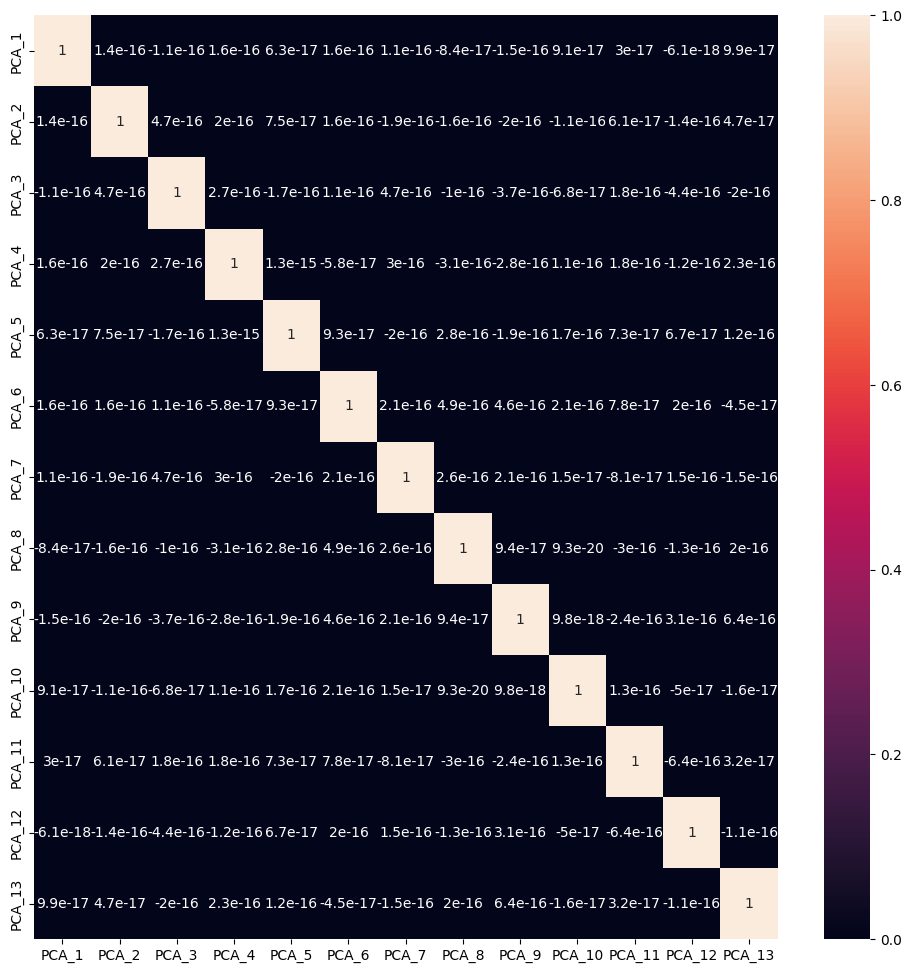

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(X_transformed_df.corr(), annot=True)

In [28]:
scaled_df.loc[0] #first row before PCA

0    -0.419782
1     0.284830
2    -1.287909
3    -0.272599
4    -0.144217
5     0.413672
6    -0.120013
7     0.140214
8    -0.982843
9    -0.666608
10   -1.459000
11    0.441052
12   -1.075562
Name: 0, dtype: float64

In [29]:
X_transformed_df.loc[0] #first row after PCA

PCA_1    -2.098297
PCA_2     0.773113
PCA_3     0.342943
PCA_4    -0.891774
PCA_5     0.423070
PCA_6    -0.315338
PCA_7     0.318641
PCA_8     0.295832
PCA_9    -0.424937
PCA_10    0.640206
PCA_11   -0.033000
PCA_12    0.019440
PCA_13    0.365975
Name: 0, dtype: float64

##Explained variance

In [30]:
pca.explained_variance_

array([6.1389812 , 1.43611329, 1.2450773 , 0.85927328, 0.83646904,
       0.65870897, 0.5364162 , 0.39688167, 0.27749173, 0.22067394,
       0.18638271, 0.16963823, 0.06363502])

##Explained variance ratio

In [31]:
pca.explained_variance_ratio_

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331, 0.00488533])

##Scree Plot

Text(0, 0.5, 'Eigenvalue')

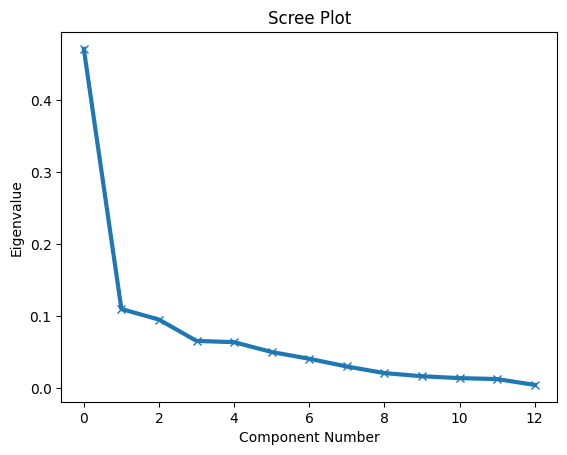

In [32]:
plt.plot(list(range(13)), pca.explained_variance_ratio_, 'x-', linewidth = 3)
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')

In [33]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47129606, 0.581548  , 0.67713389, 0.74310121, 0.80731782,
       0.8578876 , 0.89906884, 0.92953786, 0.9508412 , 0.96778257,
       0.98209137, 0.99511467, 1.        ])

Text(0, 0.5, 'Eigenvalue')

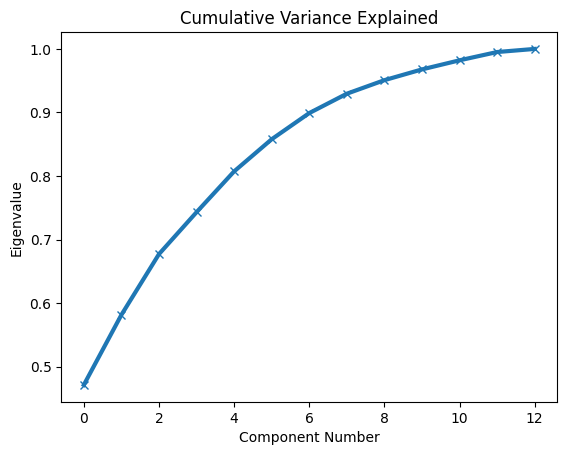

In [34]:
plt.plot(list(range(13)), np.cumsum(pca.explained_variance_ratio_), 'x-', linewidth=3)
plt.title('Cumulative Variance Explained')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')

In [35]:
#We can see that approximately 80% of variance is explained by the first 4 variables.

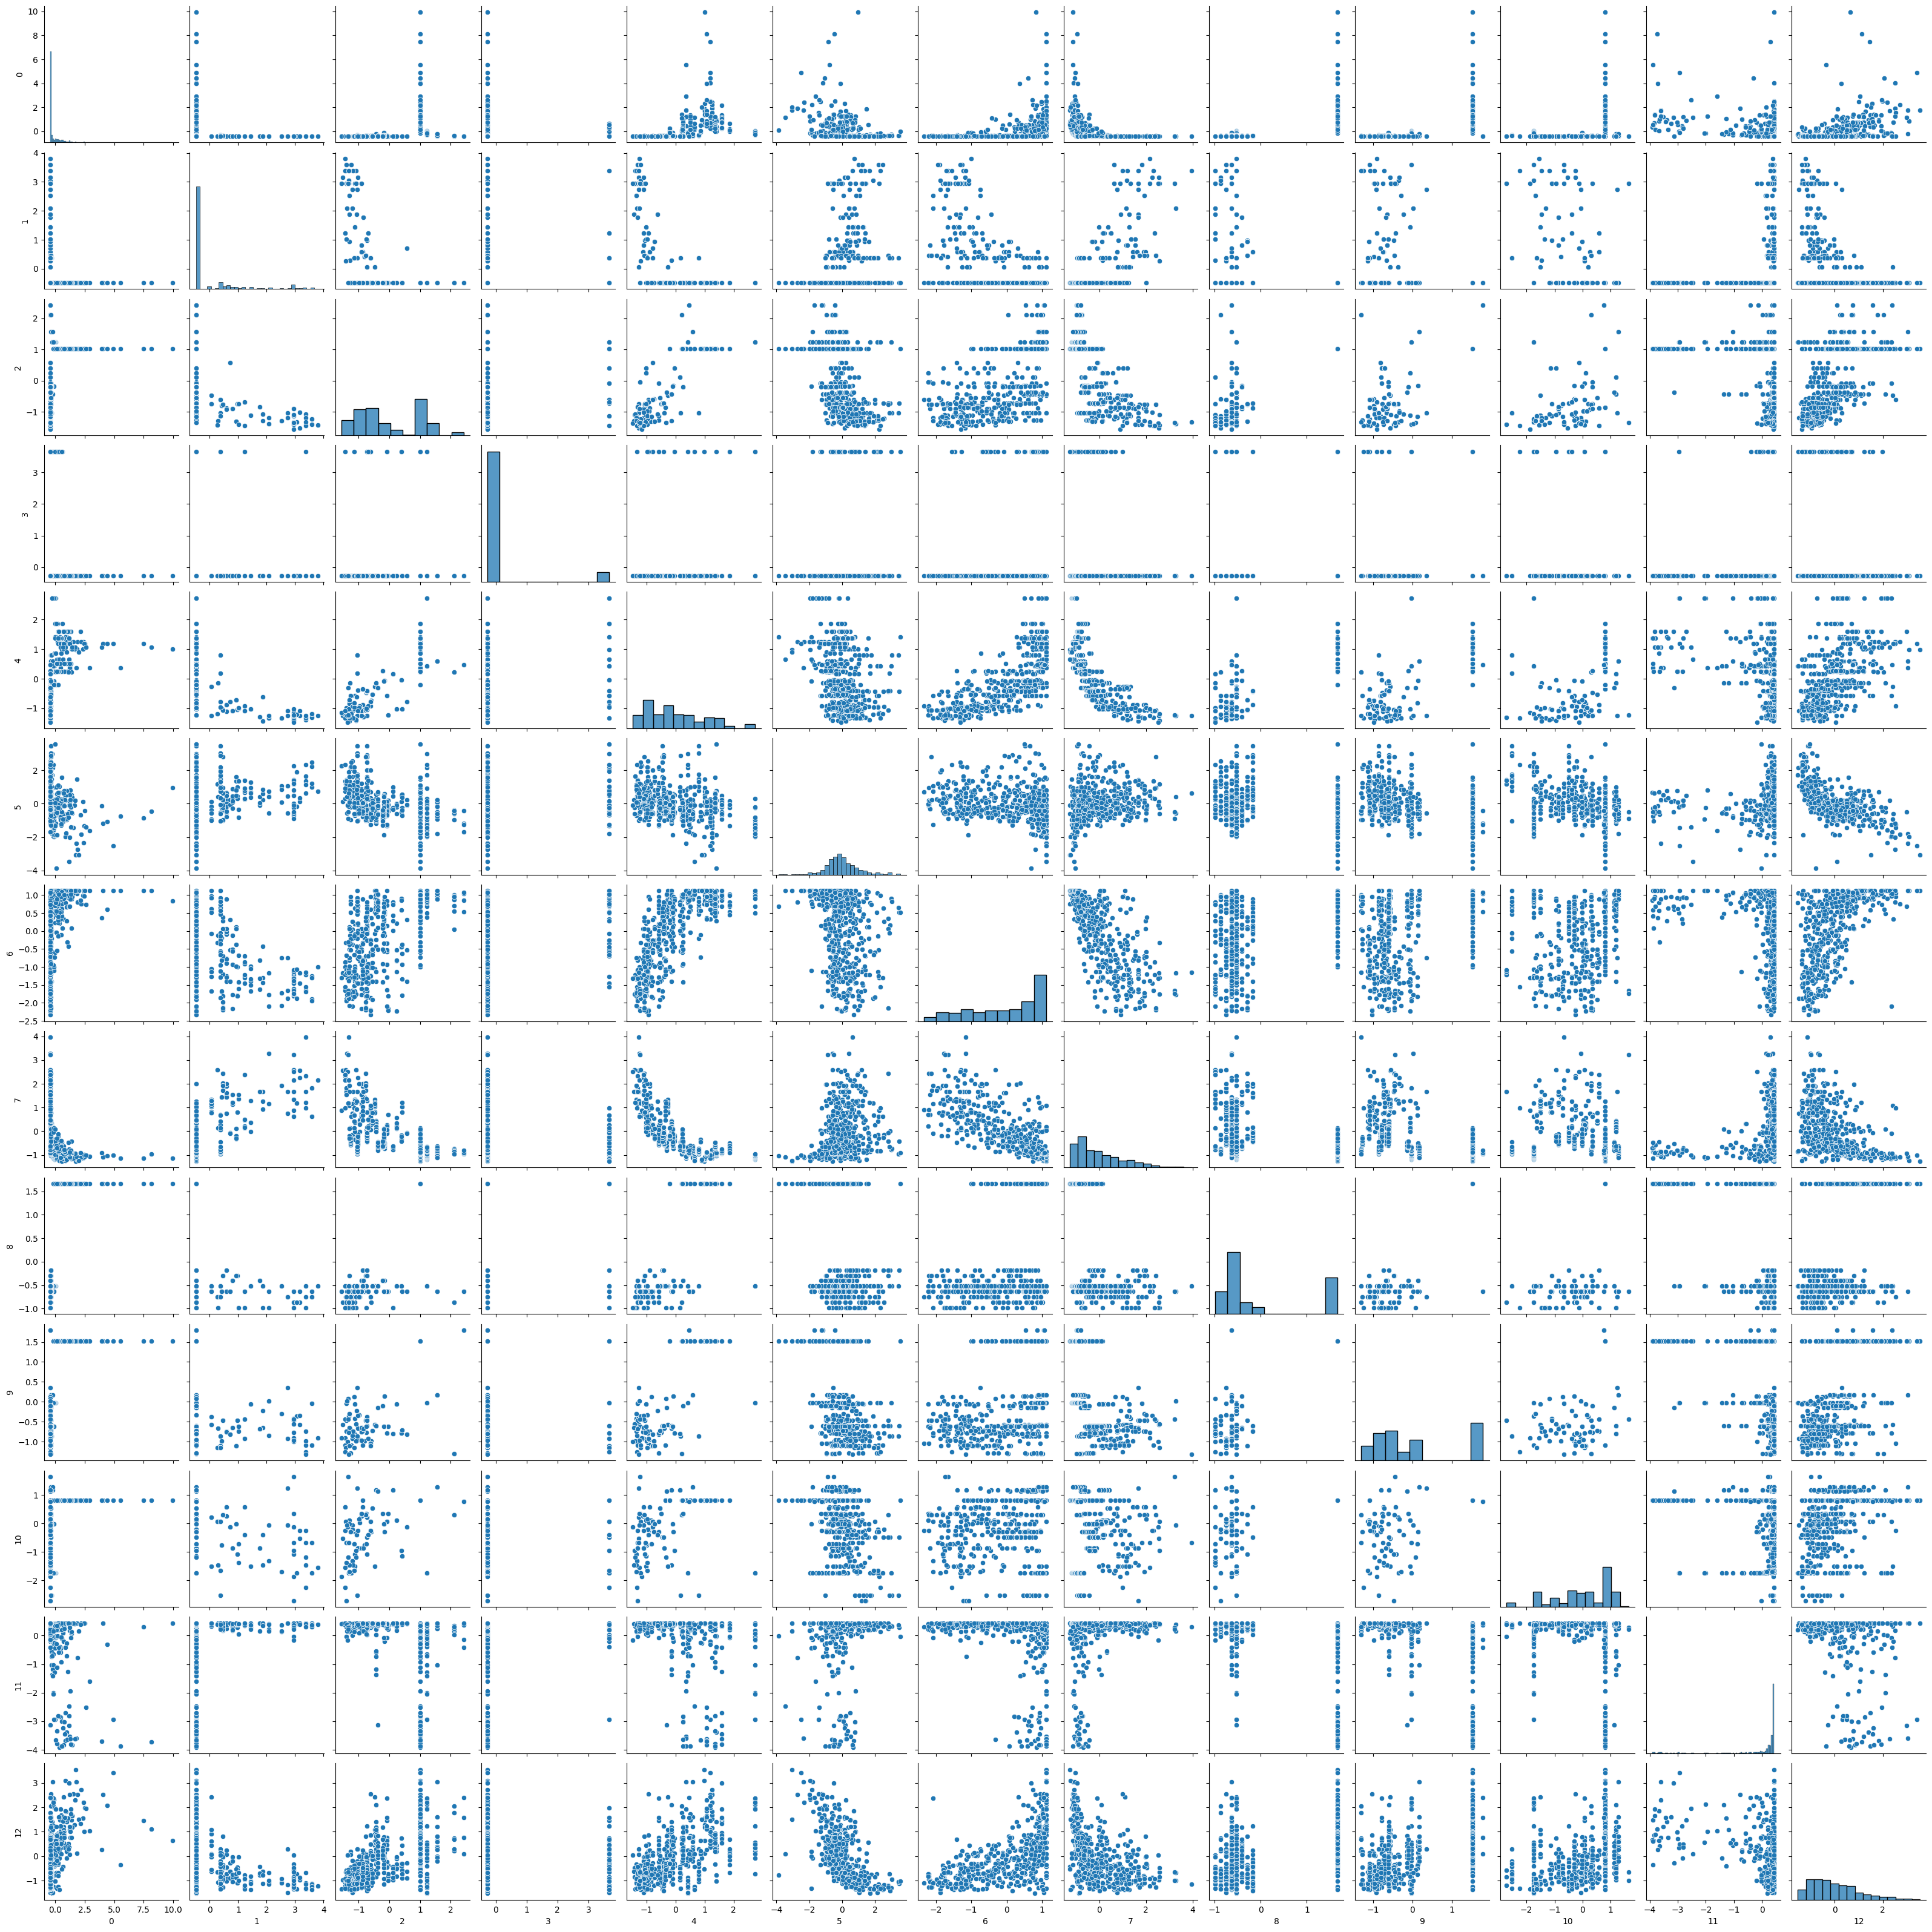

In [36]:
sns.pairplot(scaled_df)